In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df = pd.read_excel('superstore_sales.xlsx')
df.head() 

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


####  Get the number of rows and columns

In [9]:
df.shape

(51290, 21)

#### Check the data types of the columns for the dataset 

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

#### Checking for the duplicate values

In [9]:
df.duplicated().sum() 

np.int64(0)

##### As we can see that here there is no duplicate values 
 If we got some duplicate values then we will drop them

#### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing a dataset to summarize its main characteristics, often using visual methods. EDA helps understand the structure, patterns, and relationships within the data before applying more complex analyses or models.
* Checking data types, shape, and summary statistics.
* Identifying columns, their data types (numerical, categorical, date, etc.), and any data inconsistencies.

In [10]:
df.describe().T 

,count,mean,min,25%,50%,75%,max,std
order_date,51290,2013-05-11 21:26:49.155780864,2011-01-01 00:00:00,2012-06-19 00:00:00,2013-07-08 00:00:00,2014-05-22 00:00:00,2014-12-31 00:00:00,NaN
ship_date,51290,2013-05-15 20:42:42.745174528,2011-01-03 00:00:00,2012-06-23 00:00:00,2013-07-12 00:00:00,2014-05-26 00:00:00,2015-01-07 00:00:00,NaN
sales,51290.0,246.490581,0.444,30.758625,85.053,251.0532,22638.48,487.565361
quantity,51290.0,3.476545,1.0,2.0,3.0,5.0,14.0,2.278766
discount,51290.0,0.142908,0.0,0.0,0.0,0.2,0.85,0.21228
profit,51290.0,28.64174,-6599.978,0.0,9.24,36.81,8399.976,174.424113
shipping_cost,51290.0,26.375818,0.002,2.61,7.79,24.45,933.57,57.29681
year,51290.0,2012.777208,2011.0,2012.0,2013.0,2014.0,2014.0,1.098931


* We can see that average value of each sale is 246.49 RS
* Atleast 50 percent of the products do not have discount
* On 25 percent products we are not making any kind of profit
* Average shipping cost per product is 26.37 RS

### Univariate Data Analysis

#### Analysis For The Sales

Analysis for sales
Mean: 246.49058120257362
Median: 85.053
Mode: 12.96
Standard Deviation: 487.5653605385643
Skewness: 8.13808002122054
Kurtosis: 176.7311999336455
--------------------------------------------------


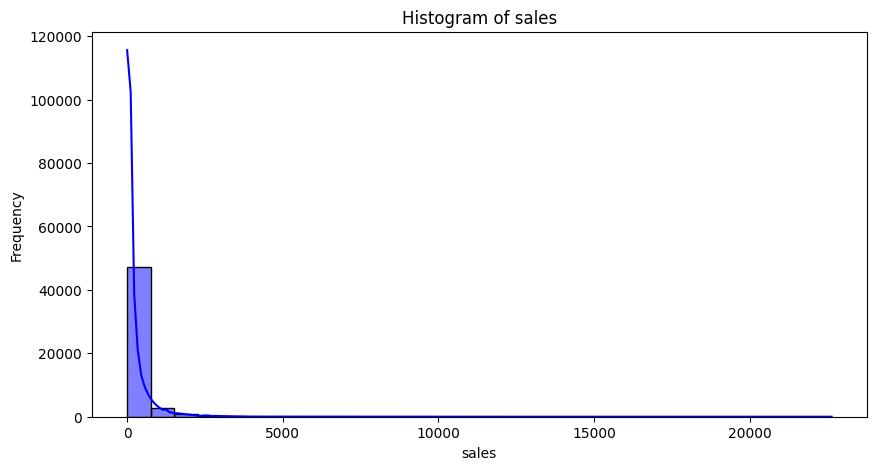

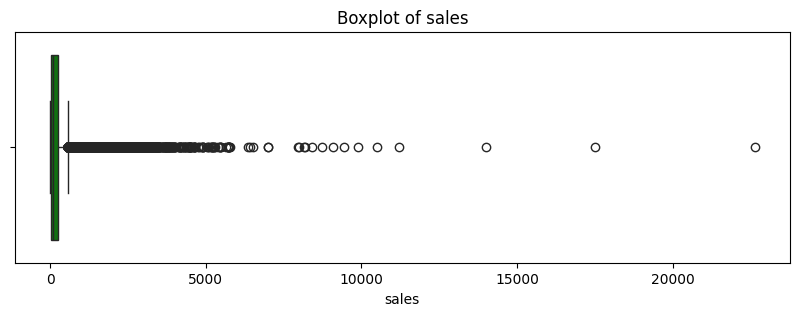

In [11]:
# Univariate Analysis: Sales
column = 'sales'

# Descriptive Statistics
print(f"Analysis for {column}")
print(f"Mean: {df[column].mean()}")
print(f"Median: {df[column].median()}")
print(f"Mode: {df[column].mode()[0]}")
print(f"Standard Deviation: {df[column].std()}")
print(f"Skewness: {df[column].skew()}")
print(f"Kurtosis: {df[column].kurt()}")
print("-" * 50)

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df[column], kde=True, bins=30, color="blue")
plt.title(f"Histogram of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(x=df[column], color="green")
plt.title(f"Boxplot of {column}")
plt.show()


* Distribution Shape:

The histogram shows a highly right-skewed distribution. Most of the sales values are concentrated near zero, with a long tail extending to the right. This indicates that while most sales transactions are relatively low, there are a few high-value transactions.

* Implications for Analysis:

The majority of sales are clustered at low values, which suggests that most transactions are low-value purchases.
The presence of high-value outliers may indicate occasional large transactions, which could be important for business strategy (e.g., focusing on high-value customers).

#### Analysis For The Profit

Analysis for profit
Mean: 28.64173954533047
Median: 9.24
Mode: 0.0
--------------------------------------------------


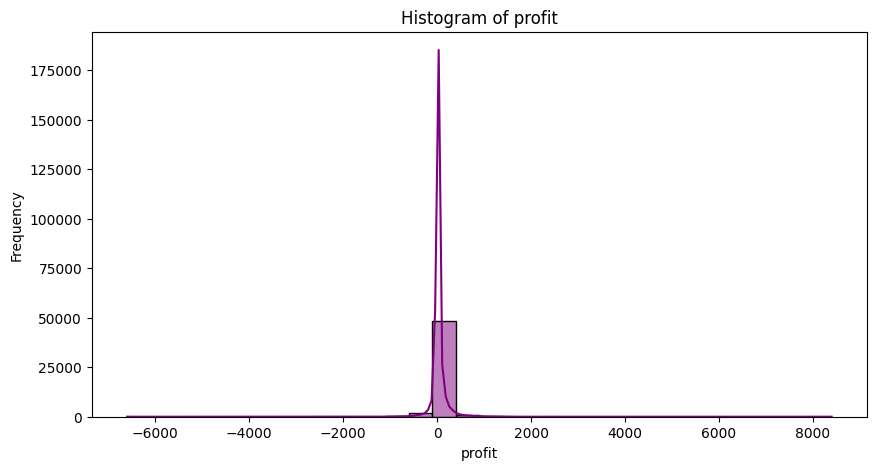

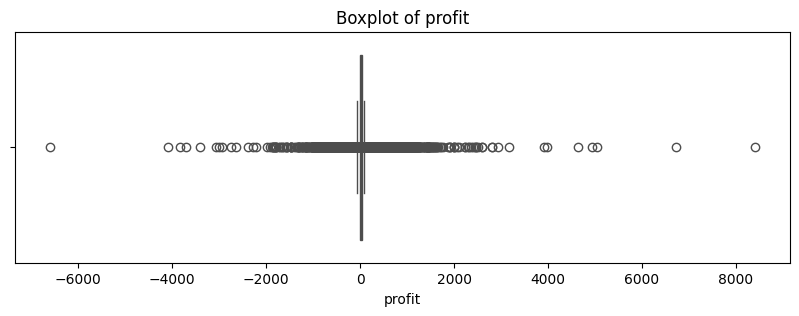

In [3]:
# Univariate Analysis: Profit
column = 'profit'

# Descriptive Statistics
print(f"Analysis for {column}")
print(f"Mean: {df[column].mean()}")
print(f"Median: {df[column].median()}")
print(f"Mode: {df[column].mode()[0]}")
print("-" * 50)

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df[column], kde=True, bins=30, color="purple")
plt.title(f"Histogram of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(x=df[column], color="orange")
plt.title(f"Boxplot of {column}")
plt.show()


* Distribution Shape:

Similar to the sales histogram, the profit data is highly concentrated around zero, with a narrow peak and a long tail in both directions. This indicates that most of the transactions have relatively low profit margins, with only a few instances of high positive or negative profits (losses).

#### Analysis for the region

Frequency Count for region
region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64
--------------------------------------------------


C:\Users\laksh\AppData\Local\Temp\ipykernel_10696\2408412875.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], order=df[column].value_counts().index, palette="coolwarm")


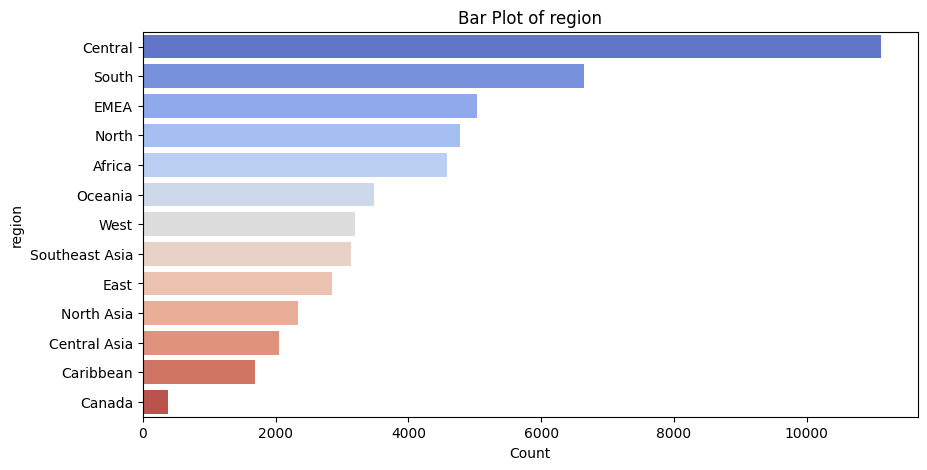

In [13]:
# Univariate Analysis: Region
column = 'region'

# Frequency Count
print(f"Frequency Count for {column}")
print(df[column].value_counts())
print("-" * 50)

# Bar Plot
plt.figure(figsize=(10, 5))
sns.countplot(y=df[column], order=df[column].value_counts().index, palette="coolwarm")
plt.title(f"Bar Plot of {column}")
plt.xlabel("Count")
plt.ylabel(column)
plt.show()


* Top Regions by Count:

The Central region has the highest count, followed by the South and EMEA regions. This suggests that a significant portion of the transactions or entries in the dataset are from these regions.
These high counts may indicate that the business or dataset has more operations or customer interactions in these regions compared to others.
* Least Represented Regions:

Canada and the Caribbean regions have the lowest counts. This might suggest limited business activity or customer base in these regions, which could either be a strategic choice or an area of potential growth.

<H4>  Which are the most selling products?


In [5]:
boughts = df.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:10]
boughts

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

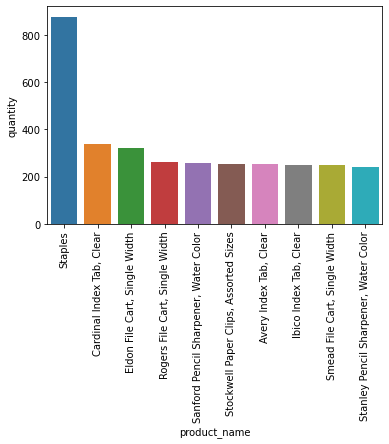

In [6]:
sns.barplot(x='product_name',y='quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

 <h4>  - Which are the Top 10 products by sales?

In [7]:
productSales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
productSales.sort_values(by=['sales'], inplace=True, ascending=False)
productSales.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<h4> Which are the most profitable products?


In [8]:
profitable_products = pd.DataFrame(df.groupby(['product_name']).sum()['profit'])
profitable_products.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_products.head(10)

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

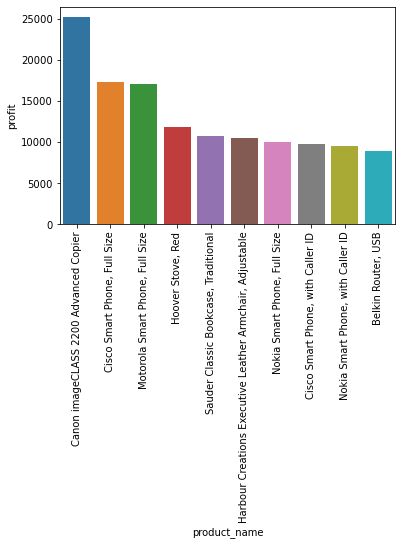

In [9]:
sns.barplot(x='product_name',y='profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

<h4> - Which are the most profitable category?

In [11]:
profitable_category = pd.DataFrame(df.groupby(['category']).sum()['profit'])
profitable_category.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_category

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


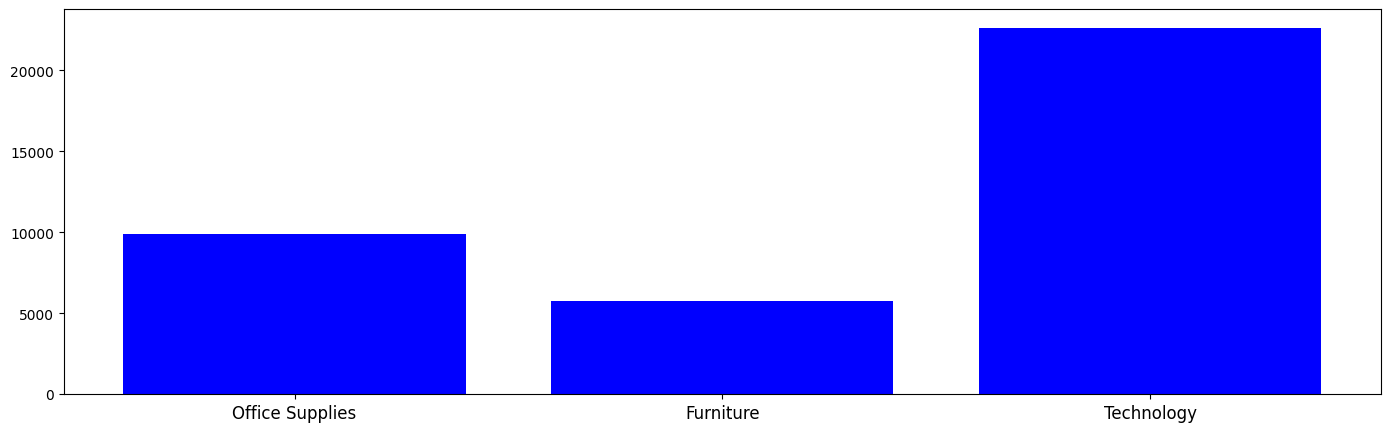

In [6]:
plt.figure(figsize=(17, 5))
plt.bar(df['category'],df['sales'],color = 'b')
plt.xticks(size=12)
plt.show()

<h4>  - Which customer segments are the most profitable ?

In [15]:
profitable_segment = pd.DataFrame(df.groupby(['segment']).sum()['profit'])
profitable_segment.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_segment

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

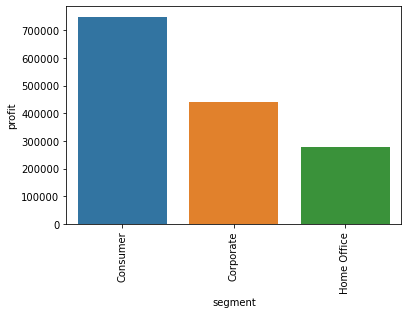

In [16]:
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

<h4>  What shipping modes sold the most products?

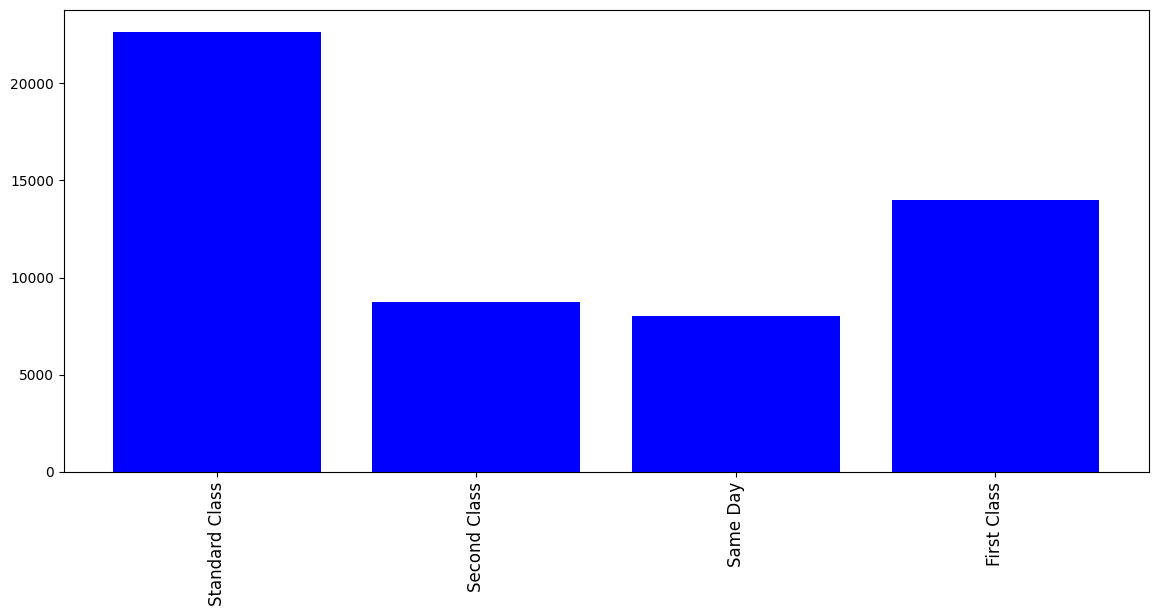

In [7]:
plt.figure(figsize=(14, 6))
plt.bar(df['ship_mode'],df['sales'],color = 'b')
plt.xticks(rotation='vertical', size=12)
plt.show()

<h4>  What market sold the most products?

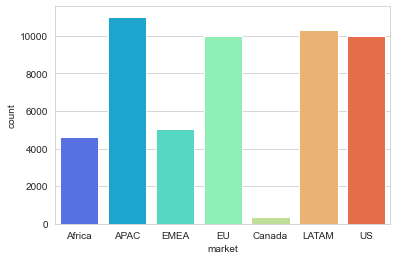

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=df, palette='rainbow')

<h4>  - Which are the Top 10 country by sales? 

In [20]:
countries = pd.DataFrame(df.groupby('country').sum()['sales'])
countries.sort_values('sales',inplace=True, ascending=False)
countries.head(10)

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


<h4> - Create a pie chart with the 10 countries that have the most sales

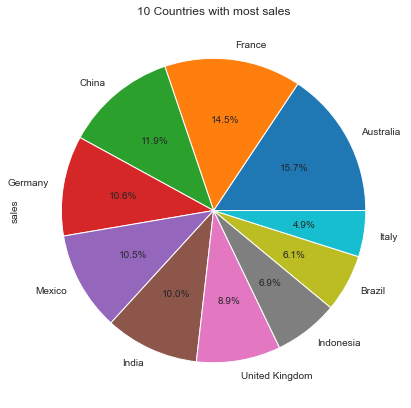

In [21]:
countries = countries.sort_values(by = 'sales',ascending = False)[1:11]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Countries with most sales')
plt.show()

<h4>  - Which are the average shipping cost for top 10 different countries?


In [23]:
df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.660714
Chad,148.970000
Lesotho,135.650000
Montenegro,93.937500
Slovenia,61.220000
Republic of the Congo,59.303333
Central African Republic,57.625714
Namibia,50.370000
Bangladesh,46.402883


####  Who are the top-10 most profitable customers?


In [24]:
data10 = df.sort_values('profit',ascending=False).head(10)[['order_id','customer_name','profit']]
data10

,order_id,customer_name,profit
29530,CA-2013-118689,Tamara Chand,8399.9760
36239,CA-2014-140151,Raymond Buch,6719.9808
48097,CA-2014-166709,Hunter Lopez,5039.9856
33011,CA-2013-117121,Adrian Barton,4946.3700
5522,CA-2011-116904,Sanjit Chand,4630.4755
43831,ES-2014-1651774,Patrick Jones,3979.0800
46525,CA-2014-127180,Tom Ashbrook,3919.9888
10265,CA-2012-145352,Christopher Martinez,3177.4750
548,ID-2011-64599,Carol Adams,2939.3100
24420,IN-2013-50809,Cynthia Arntzen,2817.9900


####  - Total sales values by year and month 

In [26]:
date = df.groupby(['year','month']).sum()
date

sales  quantity  discount       profit  shipping_cost
year month                                                              
2011 1       98898.48886      1463    68.758   8321.80096    10544.78800
     2       91152.15698      1224    52.252  12417.90698    10681.16300
     3      145729.36736      1836    74.212  15303.56826    13096.18550
     4      116915.76418      2020    80.782  12902.32438    12954.52000
     5      146747.83610      2013    82.382  12183.82870    16443.20600
     6      215207.38022      3112   159.534  23415.24702    23813.10900
     7      115510.41912      1774    80.086   5585.00352    11844.47600
     8      207581.49122      3035   121.462  23713.66772    22001.13600
     9      290214.45534      3707   137.678  35776.88394    29664.85100
     10     199071.26404      2727   110.192  25963.41834    21380.08200
     11     298496.53752      4039   178.836  32709.17772    34701.99800
     12     333925.73460      4493   187.220  40647.98400    37144.83100
2012 1      135780.72024      1845    74.454  10401.63764    13665.74900
     2      100510.21698      1473    62.784  15000.09618    11393.72600
     3      163076.77116      2237   101.682  17992.91756    16170.78500
     4      161052.26952      2250    93.248  17366.96722    16767.86200
     5      208364.89124      2921   114.272  29876.70374    23801.61700
     6      256175.69842      3671   168.284  34407.15362    28155.90000
     7      145236.78512      2321   104.404  15585.38842    17334.43500
     8      303142.94238      3818   136.166  43573.87858    32038.73000
     9      289389.16564      4205   169.070  27776.18034    28023.17800
     10     252939.85020      3563   135.866  30662.88270    25085.74000
     11     323512.41690      5193   215.868  31820.72180    33489.74100
     12     338256.96660      4614   172.676  32950.75130    37563.36100
2013 1      199185.90738      2413    91.442  26810.55968    21677.43200
     2      167239.65040      2102    78.012  25340.02610    16911.85000
     3      198594.03012      2686   114.384  23433.77462    21268.01000
     4      177821.31684      2688   116.116  19462.03844    19133.23400
     5      260498.56470      3808   153.092  28495.69410    28315.21100
     6      396519.61190      5327   213.642  45478.41340    42814.02600
     7      229928.95200      3252   125.644  28863.82720    24501.84236
     8      326488.78936      4934   202.640  31023.66846    35673.08800
     9      376619.24568      5793   240.674  38905.66778    38488.40000
     10     293406.64288      3883   160.860  42433.22258    31174.68400
     11     373989.36010      5556   215.324  48062.99670    41407.16700
     12     405454.37802      5694   223.692  50202.87112    43183.80000
2014 1      241268.55566      3122   127.928  28001.38626    24870.80100
     2      184837.35556      2482   111.126  19751.69996    19525.80000
     3      263100.77262      3722   142.016  37357.26052    26838.63554
     4      242771.86130      3594   164.000  23782.30120    26272.71800
     5      288401.04614      4300   188.986  33953.55774    31882.58300
     6      401814.06310      6009   251.462  43778.60280    41894.07600
     7      258705.68048      3637   163.512  28035.87258    29581.73300
     8      456619.94236      5824   217.672  53542.89496    46759.35300
     9      481157.24370      6837   272.094  67979.45110    53485.43000
     10     422766.62916      5876   233.752  58209.83476    44622.41400
     11     555279.02700      7706   304.384  62856.58790    59918.35500
     12     503143.69348      7513   335.106  46916.52068    54853.89100

#### - Total sales chart by the year 

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

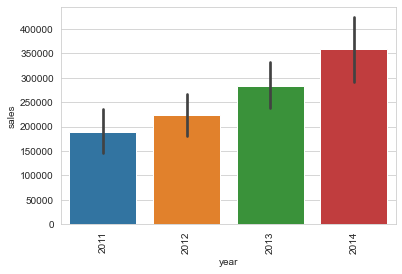

In [27]:
sns.barplot(x='year',y='sales',data=date.reset_index())
plt.xticks(rotation = 'vertical')